# Student grades prediction

# Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns

-Seat No : The enrolled number of candidate that took the exams


    CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 

· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 

    Predict - CGPA of a student based on different grades in four years.

Dataset Link-

•  https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Grades/Grades.csv


In [1]:
# import necessory library 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
# download data file in local system

data=pd.read_csv(r"C:\Assignements & HW\Internship\project1\Grades.csv")
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [4]:
data.shape

(571, 43)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [8]:
data.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [25]:
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
ohe = OneHotEncoder()
si = SimpleImputer()


In [26]:
# fill NAN using label encoder
lab_enc = LabelEncoder()

In [29]:
df2 = lab_enc.fit_transform(data['PH-121'])

pd.Series(df2)

0      5
1      0
2      0
3      9
4      2
      ..
566    3
567    1
568    3
569    0
570    6
Length: 571, dtype: int32

In [32]:
data['PH-121'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [31]:
df2 = lab_enc.fit_transform(data['HS-101'])

pd.Series(df2)

data['HS-101'] = df2
data

0      10
1       9
2       3
3       7
4       2
       ..
566     0
567     0
568     0
569     4
570     9
Length: 571, dtype: int32

In [33]:
data['HS-101'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [34]:
df2 = lab_enc.fit_transform(data['CY-105'])

pd.Series(df2)

data['CY-105'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [35]:
df2 = lab_enc.fit_transform(data['HS-105/12'])

pd.Series(df2)

data['HS-105/12'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [36]:
df2 = lab_enc.fit_transform(data['MT-111'])

pd.Series(df2)

data['MT-111'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [37]:
df2 = lab_enc.fit_transform(data['CS-105'])

pd.Series(df2)

data['CS-105'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [38]:
df2 = lab_enc.fit_transform(data['CS-106'])

pd.Series(df2)

data['CS-106'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [39]:
df2 = lab_enc.fit_transform(data['EL-102'])

pd.Series(df2)

data['EL-102'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [40]:
df2 = lab_enc.fit_transform(data['MT-111'])

pd.Series(df2)

data['MT-111'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [41]:
df2 = lab_enc.fit_transform(data['EE-119'])

pd.Series(df2)

data['EE-119'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,D,B,B,C-,D,C,B,B-,C,2.193


In [42]:
df2 = lab_enc.fit_transform(data['ME-107'])

pd.Series(df2)

data['ME-107'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,D,B,B,C-,D,C,B,B-,C,2.193


In [43]:
df2 = lab_enc.fit_transform(data['CS-107'])

pd.Series(df2)

data['CS-107'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,D,B,B,C-,D,C,B,B-,C,2.193


In [44]:
df2 = lab_enc.fit_transform(data['HS-205/20'])

pd.Series(df2)

data['HS-205/20'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,D,B,B,C-,D,C,B,B-,C,2.193


In [45]:
df2 = lab_enc.fit_transform(data['MT-222'])

pd.Series(df2)

data['MT-222'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,D,B,B,C-,D,C,B,B-,C,2.193


In [46]:
df2 = lab_enc.fit_transform(data['EE-222'])

pd.Series(df2)

data['EE-222'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,D,B,B,C-,D,C,B,B-,C,2.193


In [47]:
df2 = lab_enc.fit_transform(data['MT-224'])

pd.Series(df2)

data['MT-224'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,D,B,B,C-,D,C,B,B-,C,2.193


In [48]:
df2 = lab_enc.fit_transform(data['CS-210'])

pd.Series(df2)

data['CS-210'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,D,B,B,C-,D,C,B,B-,C,2.193


In [49]:
df2 = lab_enc.fit_transform(data['CS-211'])

pd.Series(df2)

data['CS-211'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,D,B,B,C-,D,C,B,B-,C,2.193


In [50]:
df2 = lab_enc.fit_transform(data['CS-203'])

pd.Series(df2)

data['CS-203'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,D,B,B,C-,D,C,B,B-,C,2.193


In [51]:
df2 = lab_enc.fit_transform(data['CS-214'])

pd.Series(df2)

data['CS-214'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,D,B,B,C-,D,C,B,B-,C,2.193


In [52]:
df2 = lab_enc.fit_transform(data['EE-217'])

pd.Series(df2)

data['EE-217'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,D,B,B,C-,D,C,B,B-,C,2.193


In [53]:
df2 = lab_enc.fit_transform(data['CS-212'])

pd.Series(df2)

data['CS-212'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,D,B,B,C-,D,C,B,B-,C,2.193


In [54]:
df2 = lab_enc.fit_transform(data['CS-215'])

pd.Series(df2)

data['CS-215'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,D,B,B,C-,D,C,B,B-,C,2.193


In [55]:
df2 = lab_enc.fit_transform(data['MT-331'])

pd.Series(df2)

data['MT-331'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,D,B,B,C-,D,C,B,B-,C,2.193


In [56]:
df2 = lab_enc.fit_transform(data['EF-303'])

pd.Series(df2)

data['EF-303'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,D,B,B,C-,D,C,B,B-,C,2.193


In [57]:
df2 = lab_enc.fit_transform(data['HS-304'])

pd.Series(df2)

data['HS-304'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,D,B,B,C-,D,C,B,B-,C,2.193


In [58]:
df2 = lab_enc.fit_transform(data['CS-301'])

pd.Series(df2)

data['CS-301'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,D,B,B,C-,D,C,B,B-,C,2.193


In [59]:
df2 = lab_enc.fit_transform(data['CS-302'])

pd.Series(df2)

data['CS-302'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,D,B,B,C-,D,C,B,B-,C,2.193


In [60]:
df2 = lab_enc.fit_transform(data['TC-383'])

pd.Series(df2)

data['TC-383'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,D,B,B,C-,D,C,B,B-,C,2.193


In [61]:
df2 = lab_enc.fit_transform(data['MT-442'])

pd.Series(df2)

data['MT-442'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,D,B,B,C-,D,C,B,B-,C,2.193


In [62]:
df2 = lab_enc.fit_transform(data['EL-332'])

pd.Series(df2)

data['EL-332'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,D,B,B,C-,D,C,B,B-,C,2.193


In [63]:
df2 = lab_enc.fit_transform(data['CS-318'])

pd.Series(df2)

data['CS-318'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,D,B,B,C-,D,C,B,B-,C,2.193


In [64]:
df2 = lab_enc.fit_transform(data['CS-306'])

pd.Series(df2)

data['CS-306'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,D,B,B,C-,D,C,B,B-,C,2.193


In [65]:
df2 = lab_enc.fit_transform(data['CS-312'])

pd.Series(df2)

data['CS-312'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,8,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,10,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,3,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,10,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,5,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,2,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,4,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,2,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,9,B,B,C-,D,C,B,B-,C,2.193


In [66]:
df2 = lab_enc.fit_transform(data['CS-317'])

pd.Series(df2)

data['CS-317'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,8,8,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,10,9,C,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,3,3,A,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,10,6,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,5,4,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,2,2,A,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,4,4,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,2,3,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,9,3,B,C-,D,C,B,B-,C,2.193


In [67]:
df2 = lab_enc.fit_transform(data['CS-403'])

pd.Series(df2)

data['CS-403'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,8,8,8,C-,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,10,9,6,D,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,3,3,0,C,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,10,6,10,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,5,4,4,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,2,2,0,A,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,4,4,0,A,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,2,3,0,B+,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,9,3,3,C-,D,C,B,B-,C,2.193


In [68]:
df2 = lab_enc.fit_transform(data['CS-421'])

pd.Series(df2)

data['CS-421'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,8,8,8,8,A-,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,10,9,6,9,A-,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,3,3,0,6,A,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,10,6,10,8,B-,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,5,4,4,5,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,2,2,0,0,A,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,4,4,0,0,A-,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,2,3,0,4,A,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,9,3,3,8,D,C,B,B-,C,2.193


In [69]:
df2 = lab_enc.fit_transform(data['CS-406'])

pd.Series(df2)

data['CS-406'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,8,8,8,8,2,A,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,10,9,6,9,2,B-,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,3,3,0,6,0,A,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,10,6,10,8,5,B,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,2,2,0,0,0,B+,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,4,4,0,0,2,B,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,2,3,0,4,0,C,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,9,3,3,8,9,C,B,B-,C,2.193


In [70]:
df2 = lab_enc.fit_transform(data['CS-414'])

pd.Series(df2)

data['CS-414'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,C-,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,C,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,A,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,C+,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,2,2,0,0,0,4,B+,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,4,4,0,0,2,3,A-,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,2,3,0,4,0,6,B+,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,9,3,3,8,9,6,B,B-,C,2.193


In [71]:
df2 = lab_enc.fit_transform(data['CS-419'])

pd.Series(df2)

data['CS-419'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,8,B,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,6,C,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,0,A-,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,7,C+,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,2,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,2,2,0,0,0,4,4,B,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,4,4,0,0,2,3,2,C,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,2,3,0,4,0,6,4,A-,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,9,3,3,8,9,6,3,B-,C,2.193


In [72]:
df2 = lab_enc.fit_transform(data['CS-423'])

pd.Series(df2)

data['CS-423'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,8,3,A-,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,6,6,B,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,0,2,A,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,7,7,C+,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,2,2,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,2,2,0,0,0,4,4,3,A,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,4,4,0,0,2,3,2,6,A-,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,2,3,0,4,0,6,4,2,A-,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,9,3,3,8,9,6,3,5,C,2.193


In [73]:
df2 = lab_enc.fit_transform(data['CS-412'])

pd.Series(df2)

data['CS-412'] = df2
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,10,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,8,3,2,2.205
1,CS-97002,9,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,6,6,3,2.008
2,CS-97003,3,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,0,2,0,3.608
3,CS-97004,7,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,7,7,7,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,0,0,0,2,1,0,2,2,1,...,2,2,0,0,0,4,4,3,0,3.798
567,CS-97568,0,0,0,0,0,0,0,2,0,...,4,4,0,0,2,3,2,6,2,3.772
568,CS-97569,0,0,2,4,0,0,0,0,0,...,2,3,0,4,0,6,4,2,2,3.470
569,CS-97570,4,4,9,0,9,10,5,8,5,...,9,3,3,8,9,6,3,5,6,2.193


In [74]:
# check information again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    int32  
 2   HS-101     571 non-null    int32  
 3   CY-105     571 non-null    int32  
 4   HS-105/12  571 non-null    int32  
 5   MT-111     571 non-null    int64  
 6   CS-105     571 non-null    int32  
 7   CS-106     571 non-null    int32  
 8   EL-102     571 non-null    int32  
 9   EE-119     571 non-null    int32  
 10  ME-107     571 non-null    int32  
 11  CS-107     571 non-null    int32  
 12  HS-205/20  571 non-null    int32  
 13  MT-222     571 non-null    int32  
 14  EE-222     571 non-null    int32  
 15  MT-224     571 non-null    int32  
 16  CS-210     571 non-null    int32  
 17  CS-211     571 non-null    int32  
 18  CS-203     571 non-null    int32  
 19  CS-214     571 non-null    int32  
 20  EE-217    

In [75]:
# cross check NAN
data.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [18]:
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
ohe = OneHotEncoder()
si = SimpleImputer()

In [76]:
data.nunique().to_frame(" Number of unique value ")

,Number of unique value
Seat No.,571
PH-121,12
HS-101,12
CY-105,14
HS-105/12,14
MT-111,14
CS-105,11
CS-106,14
EL-102,14
EE-119,13


In [77]:
data.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,5.071804,5.071804,2.921191,4.264448,3.935201,2.838879,4.161121,3.998249,3.921191,4.817863,...,4.299475,4.982487,3.663748,5.595447,4.770578,2.693520,4.084063,4.211909,4.570928,2.954888
std,2.785317,2.785317,2.992228,3.216478,3.034481,2.696709,2.774311,3.075939,2.698100,3.179170,...,3.580108,2.927134,3.128656,2.916243,4.565881,2.931189,2.656988,3.040475,4.085464,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,3.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,5.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,4.000000,3.000000,5.000000,...,4.000000,5.000000,3.000000,5.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.029000
75%,7.000000,7.000000,5.000000,7.000000,6.000000,4.000000,6.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,6.000000,8.000000,7.000000,4.000000,5.000000,6.000000,6.000000,3.451000
max,11.000000,11.000000,13.000000,13.000000,13.000000,10.000000,13.000000,13.000000,12.000000,13.000000,...,14.000000,12.000000,11.000000,13.000000,14.000000,13.000000,12.000000,12.000000,13.000000,3.985000


In [86]:
# Setting date as DataFrame Index 

data.set_index('Seat No.',inplace=True)

In [87]:
cor=data.corr()
cor

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,1.000000,0.334536,0.473146,0.441847,0.400713,0.321346,0.359801,0.323381,0.345819,...,0.244502,0.369839,0.265502,0.336850,0.103657,0.257124,0.309970,0.265646,0.251702,-0.537170
HS-101,1.000000,1.000000,0.334536,0.473146,0.441847,0.400713,0.321346,0.359801,0.323381,0.345819,...,0.244502,0.369839,0.265502,0.336850,0.103657,0.257124,0.309970,0.265646,0.251702,-0.537170
CY-105,0.334536,0.334536,1.000000,0.516758,0.554936,0.587845,0.404763,0.466034,0.501859,0.485183,...,0.381171,0.539259,0.578483,0.482884,0.223139,0.206669,0.551183,0.267375,0.360315,-0.670190
HS-105/12,0.473146,0.473146,0.516758,1.000000,0.505049,0.493581,0.516214,0.373136,0.425518,0.334125,...,0.337579,0.514041,0.512334,0.484061,0.184283,0.242515,0.518199,0.313219,0.267519,-0.627644
MT-111,0.441847,0.441847,0.554936,0.505049,1.000000,0.416784,0.528063,0.568940,0.422151,0.478874,...,0.534544,0.581354,0.490726,0.577514,0.101744,0.327353,0.558593,0.470404,0.224883,-0.756109
CS-105,0.400713,0.400713,0.587845,0.493581,0.416784,1.000000,0.310666,0.377496,0.522205,0.464978,...,0.147291,0.421923,0.362033,0.325876,0.379277,0.231224,0.383126,0.142609,0.448979,-0.613169
CS-106,0.321346,0.321346,0.404763,0.516214,0.528063,0.310666,1.000000,0.365975,0.304044,0.317611,...,0.519912,0.458346,0.506503,0.471248,0.033116,0.231097,0.490585,0.410040,0.114769,-0.563178
EL-102,0.359801,0.359801,0.466034,0.373136,0.568940,0.377496,0.365975,1.000000,0.464624,0.492613,...,0.396578,0.515770,0.406288,0.461098,0.103903,0.362837,0.470345,0.463383,0.256816,-0.669536
EE-119,0.323381,0.323381,0.501859,0.425518,0.422151,0.522205,0.304044,0.464624,1.000000,0.575298,...,0.224754,0.472092,0.409814,0.420696,0.341455,0.299075,0.512645,0.318122,0.427765,-0.668787
ME-107,0.345819,0.345819,0.485183,0.334125,0.478874,0.464978,0.317611,0.492613,0.575298,1.000000,...,0.281174,0.504715,0.416972,0.428022,0.259143,0.272818,0.511910,0.315812,0.412971,-0.677342


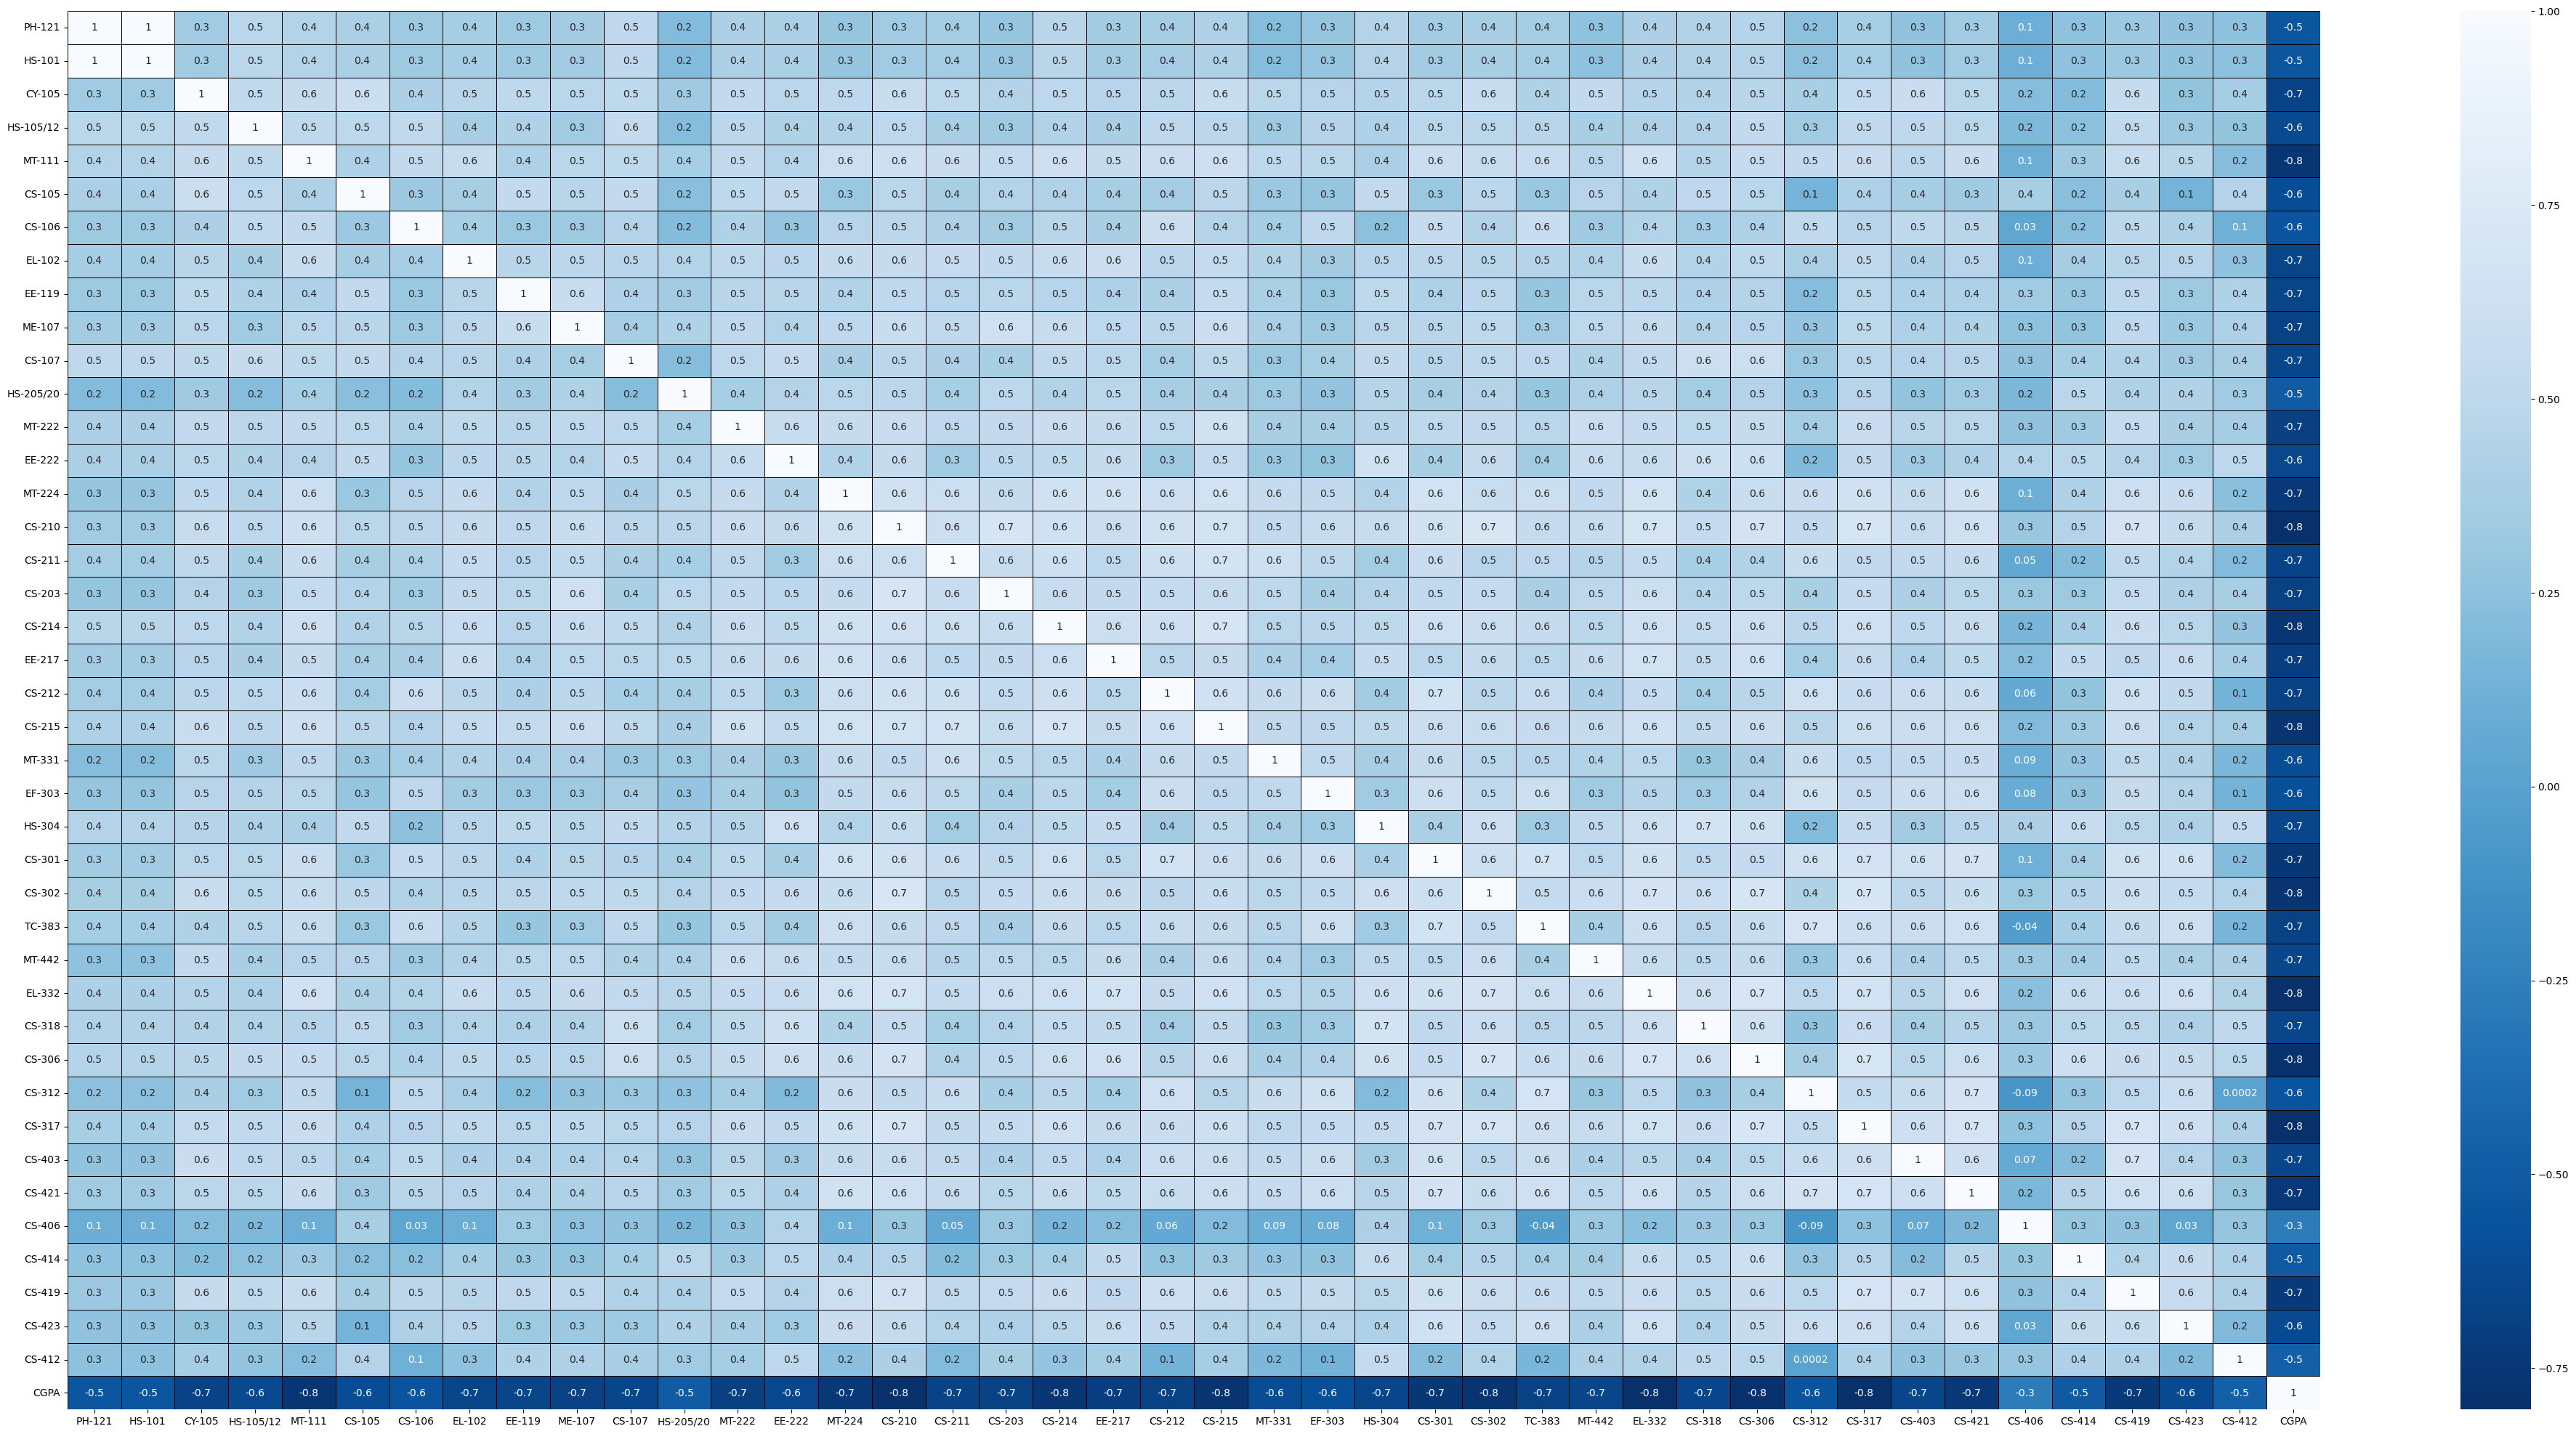

In [90]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (50,25))
sns.heatmap(data.corr(), linewidths = 0.4, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation = 0);
plt.show()


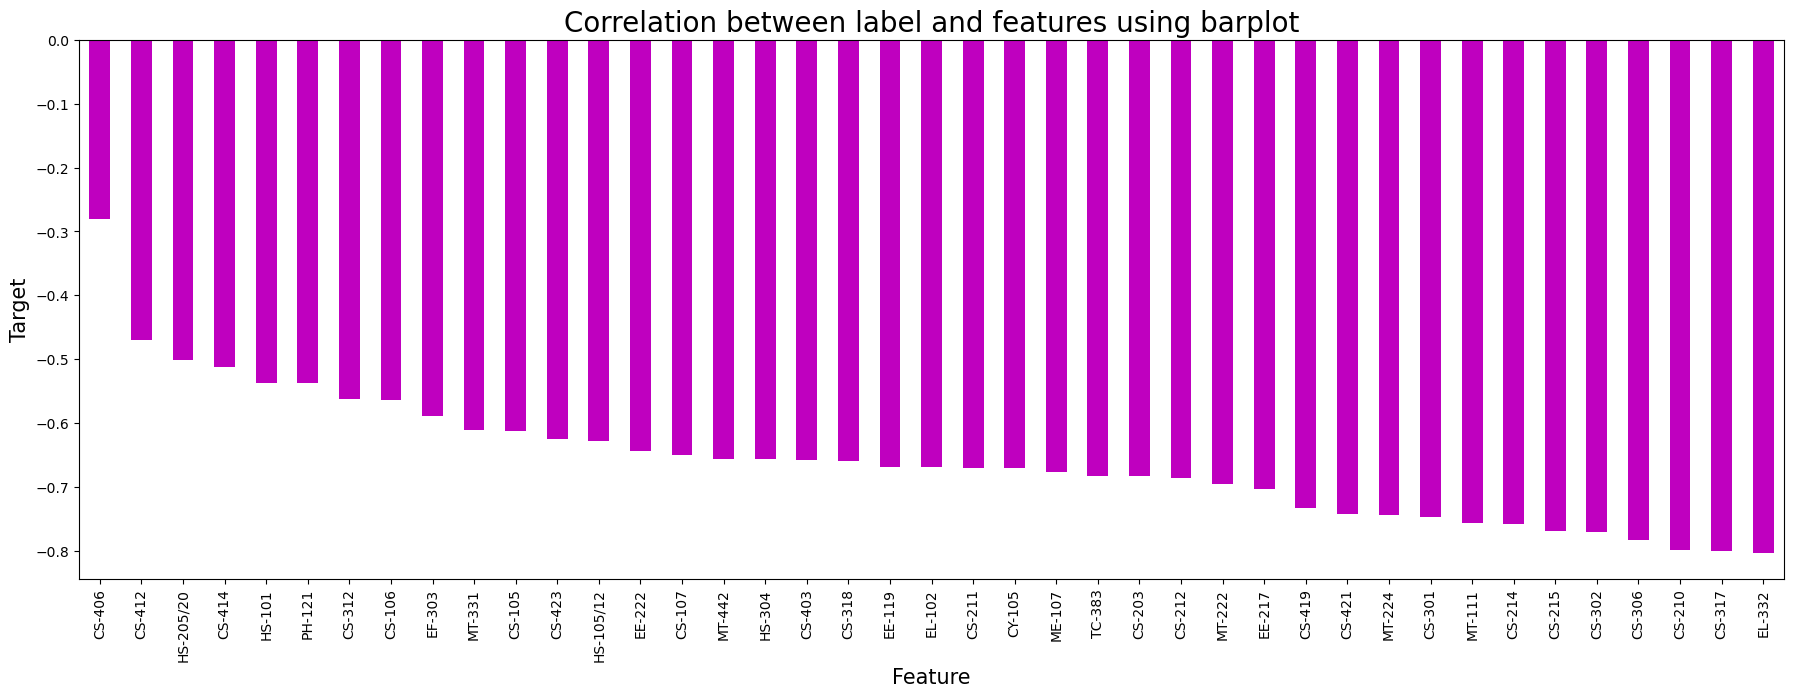

In [91]:
# correlation betweeb label and features using barplot
plt.figure(figsize=(22,7))
data.corr()['CGPA'].sort_values(ascending=False).drop(['CGPA']).plot(kind='bar', color="m")
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title("Correlation between label and features using barplot", fontsize = 20)
plt.show()

# Separating features and label

In [100]:
x = data.drop("CGPA",axis = 1)
y = data["CGPA"]

# Feature scaling using standard Scalarization

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,1.770900,1.770900,1.698822,0.540054,1.340711,2.657832,1.745703,1.302126,0.400191,1.001811,...,0.564427,1.034541,1.031780,1.387194,0.825261,-0.607332,-0.919723,1.475118,-0.398941,-0.629839
1,1.411559,1.411559,2.367806,1.473569,0.351207,1.173242,1.745703,-1.300986,2.254972,1.316634,...,1.549013,1.593674,1.373711,0.747382,1.168469,-0.607332,0.787565,0.721726,0.588612,-0.384854
2,-0.744483,-0.744483,-0.977116,0.228883,0.021373,-1.053643,0.302639,0.000570,-0.712678,-0.887129,...,-0.748354,-0.363289,-0.677873,-1.172056,0.138846,-1.045748,-0.919723,-1.538450,-0.728126,-1.119808
3,0.692879,0.692879,2.367806,1.473569,1.670546,-0.311348,2.106468,1.302126,1.884016,0.686988,...,1.220817,1.593674,0.347919,2.027007,0.825261,0.050291,0.104650,1.098422,0.917796,0.595086
4,-1.103823,-1.103823,-0.308131,-0.082289,-1.297966,-1.053643,-0.779659,0.000570,-1.454590,-0.887129,...,-0.748354,0.195843,-0.335942,0.107569,-0.204362,-0.607332,-0.919723,-0.785058,-0.728126,-1.119808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-1.822504,-1.822504,-0.977116,-0.704632,-0.968131,-1.053643,-0.779659,-0.650208,-1.083634,-0.257482,...,-0.091964,-0.642855,-1.019804,-1.172056,-1.920400,-1.045748,0.446107,-0.031666,-0.398941,-1.119808
567,-1.822504,-1.822504,-0.977116,-1.326975,-1.297966,-1.053643,-1.501191,-0.650208,-1.454590,-1.516776,...,-0.748354,-0.083723,-0.335942,-1.172056,-1.920400,-0.607332,0.104650,-0.785058,0.588612,-0.629839
568,-1.822504,-1.822504,-0.308131,-0.082289,-1.297966,-1.053643,-1.501191,-1.300986,-1.454590,-0.572306,...,-0.091964,-0.642855,-0.677873,-1.172056,-0.547570,-1.045748,1.129023,-0.031666,-0.728126,-0.629839
569,-0.385142,-0.385142,2.033314,-1.326975,1.670546,2.657832,0.302639,1.302126,0.400191,1.001811,...,-0.091964,1.314107,-0.677873,-0.212337,0.825261,0.927122,1.129023,-0.408362,0.259427,0.350101


In [114]:
# Importing necessory libraries 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [115]:
# Finding the best Random State 
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=30, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ", maxAccu, "on random_state", maxRS)

Maximum r2 score is  0.9868597767955485 on random_state 94


In [116]:
# Linear Regression Model

LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print(LR)

print('R2 score', acc)
print('R2 score on training data', acc*100)
print('MAE', mean_absolute_error(y_test, pred))
print('MSE', mean_squared_error(y_test, pred))
print('RMSE',np.sqrt(mean_squared_error(y_test, pred)))

LinearRegression()
R2 score 0.9556950922031192
R2 score on training data 95.56950922031191
MAE 0.08704907999057424
MSE 0.0125955131254277
RMSE 0.11222973369578892


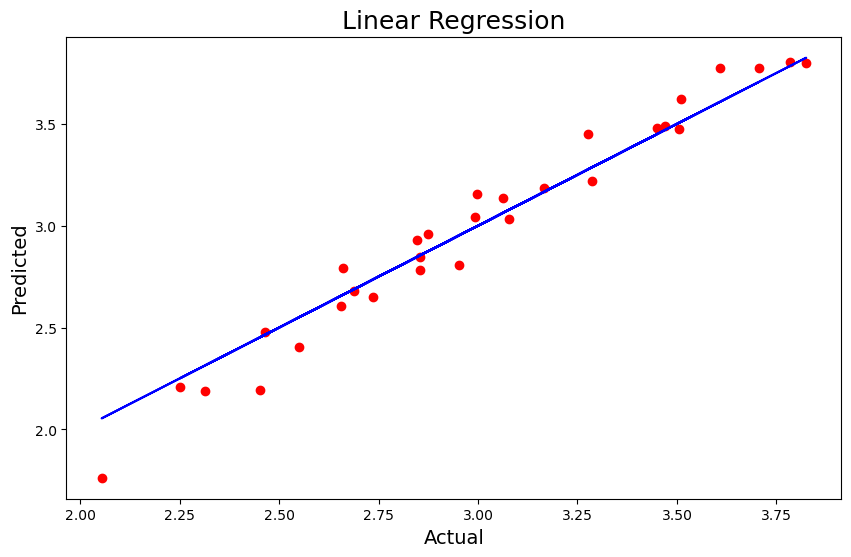

In [117]:
# actual v/s predict line using scatter plot
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR, y = y_test,color='r')
plt.plot(pred_LR, pred_LR, color='b')
plt.xlabel("Actual", fontsize=14)
plt.ylabel("Predicted", fontsize=14)
plt.title("Linear Regression", fontsize=18)
plt.show()

In [118]:
# Random forest regressor

RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print(RFR)

print('R2 score', acc)
print('R2 score on training data', acc*100)
print('MAE', mean_absolute_error(y_test, pred))
print('MSE', mean_squared_error(y_test, pred))
print('RMSE',np.sqrt(mean_squared_error(y_test, pred)))

RandomForestRegressor()
R2 score 0.9556950922031192
R2 score on training data 95.56950922031191
MAE 0.08704907999057424
MSE 0.0125955131254277
RMSE 0.11222973369578892


In [120]:
# KNN model

KN = KNN()
KN.fit(x_train, y_train)
pred_KN=KN.predict(x_test)
pred_train=KN.predict(x_train)
print(KN)

print('R2 score', acc)
print('R2 score on training data', acc*100)
print('MAE', mean_absolute_error(y_test, pred))
print('MSE', mean_squared_error(y_test, pred))
print('RMSE',np.sqrt(mean_squared_error(y_test, pred)))

KNeighborsRegressor()
R2 score 0.9556950922031192
R2 score on training data 95.56950922031191
MAE 0.08704907999057424
MSE 0.0125955131254277
RMSE 0.11222973369578892


In [121]:
# Gradient boosting regressor

GR = GradientBoostingRegressor()
GR.fit(x_train, y_train)
pred_GR=GR.predict(x_test)
pred_train=GR.predict(x_train)
print(GR)

print('R2 score', acc)
print('R2 score on training data', acc*100)
print('MAE', mean_absolute_error(y_test, pred))
print('MSE', mean_squared_error(y_test, pred))
print('RMSE',np.sqrt(mean_squared_error(y_test, pred)))

GradientBoostingRegressor()
R2 score 0.9556950922031192
R2 score on training data 95.56950922031191
MAE 0.08704907999057424
MSE 0.0125955131254277
RMSE 0.11222973369578892


In [122]:
# Lasso model

ls = Lasso()
ls.fit(x_train, y_train)
pred_ls=ls.predict(x_test)
pred_train=ls.predict(x_train)
print(ls)

print('R2 score', acc)
print('R2 score on training data', acc*100)
print('MAE', mean_absolute_error(y_test, pred))
print('MSE', mean_squared_error(y_test, pred))
print('RMSE',np.sqrt(mean_squared_error(y_test, pred)))

Lasso()
R2 score 0.9556950922031192
R2 score on training data 95.56950922031191
MAE 0.08704907999057424
MSE 0.0125955131254277
RMSE 0.11222973369578892


In [123]:
# Ridge model

ri = Ridge()
ri.fit(x_train, y_train)
pred_ri=ri.predict(x_test)
pred_train=ri.predict(x_train)
print(ri)

print('R2 score', acc)
print('R2 score on training data', acc*100)
print('MAE', mean_absolute_error(y_test, pred))
print('MSE', mean_squared_error(y_test, pred))
print('RMSE',np.sqrt(mean_squared_error(y_test, pred)))

Ridge()
R2 score 0.9556950922031192
R2 score on training data 95.56950922031191
MAE 0.08704907999057424
MSE 0.0125955131254277
RMSE 0.11222973369578892


In [124]:
# SVR model
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train, y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print(svr)

print('R2 score', acc)
print('R2 score on training data', acc*100)
print('MAE', mean_absolute_error(y_test, pred))
print('MSE', mean_squared_error(y_test, pred))
print('RMSE',np.sqrt(mean_squared_error(y_test, pred)))

SVR()
R2 score 0.9556950922031192
R2 score on training data 95.56950922031191
MAE 0.08704907999057424
MSE 0.0125955131254277
RMSE 0.11222973369578892


In [125]:
from sklearn.model_selection import cross_val_score

In [126]:
# Cross vaidation score Linear regression
score = cross_val_score(LR, x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("difference between r2 score and cross validation score  ", (r2_score(y_test, pred_LR) - score.mean())*100)

[0.93940447 0.84647317 0.94899071 0.93929002 0.92648335]
0.9201283430180434
difference between r2 score and cross validation score   3.556674918507585


In [127]:
# Cross vaidation score Random forest regressor
score1 = cross_val_score(RFR, x,y)
print(score1)
print(score1.mean())
print("difference between r2 score and cross validation score  ", (r2_score(y_test, pred_RFR) - score1.mean())*100)

[0.95504724 0.87142739 0.94862978 0.9342853  0.9412356 ]
0.9301250616051192
difference between r2 score and cross validation score   1.3805321377236557


In [128]:
# Cross vaidation score KNN
score2 = cross_val_score(KN, x,y)
print(score2)
print(score2.mean())
print("difference between r2 score and cross validation score  ", (r2_score(y_test, pred_KN) - score2.mean())*100)

[0.96683271 0.85835525 0.94550789 0.9542416  0.93361199]
0.9317098869751088
difference between r2 score and cross validation score   -0.3731205930716408


In [129]:
# Cross vaidation Gredient boosting regressor
score3 = cross_val_score(GR, x,y)
print(score3)
print(score3.mean())
print("difference between r2 score and cross validation score  ", (r2_score(y_test, pred_GR) - score3.mean())*100)

[0.96588378 0.92952399 0.96046234 0.95856147 0.96610868]
0.9561080514535266
difference between r2 score and cross validation score   -0.17620454611566583


In [130]:
# Cross vaidation score Lasso
score4 = cross_val_score(ls, x,y)
print(score4)
print(score4.mean())
print("difference between r2 score and cross validation score  ", (r2_score(y_test, pred_ls) - score4.mean())*100)

[-0.00643799 -0.0037979  -0.00364638 -0.00242138 -0.02411396]
-0.008083520623131602
difference between r2 score and cross validation score   0.2973545757796226


In [131]:
# Cross vaidation score Ridge
score5 = cross_val_score(ri, x,y)
print(score5)
print(score5.mean())
print("difference between r2 score and cross validation score  ", (r2_score(y_test, pred_ri) - score5.mean())*100)

[0.93945123 0.84632745 0.94921158 0.9396016  0.92676595]
0.9202715624938573
difference between r2 score and cross validation score   3.6846425531794735


In [132]:
# Cross vaidation score SVR
score6 = cross_val_score(svr, x,y)
print(score6)
print(score6.mean())
print("difference between r2 score and cross validation score  ", (r2_score(y_test, pred_svr) - score6.mean())*100)

[0.97369306 0.95266028 0.97029901 0.96372224 0.95441531]
0.9629579798297841
difference between r2 score and cross validation score   1.6126909895041064


In [134]:
from sklearn.model_selection import GridSearchCV

In [138]:
# Hyper parameter tunning using gridsearchcv
param={'alpha':[1.0,0.05,.4,2], 'fit_intercept':[True, False],
       'solver':['auto','svd','cholesky','isqr','sag','saga','lbfgs'],
       'positive':[False,True],
       'random_state':[1,4,10,20]}

gscv=GridSearchCV(Ridge(), param, cv=5)
gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'isqr', 'sag',
                                    'saga', 'lbfgs']})

In [139]:
gscv.best_params_

{'alpha': 2,
 'fit_intercept': True,
 'positive': False,
 'random_state': 10,
 'solver': 'saga'}

In [140]:
# using grid search cv best parameter
Model = Ridge(alpha=2, fit_intercept=True, positive= False, random_state=10,solver='saga')

In [141]:
# Final model 

Model.fit(x_train, y_train)
pred=Model.predict(x_test)

print('R2 score', r2_score(y_test,pred))
print('MAE', mean_absolute_error(y_test, pred))
print('MSE', mean_squared_error(y_test, pred))
print('RMSE',np.sqrt(mean_squared_error(y_test, pred)))

R2 score 0.9571217981444428
MAE 0.08500054103922496
MSE 0.012189912610639324
RMSE 0.11040793726285862


In [142]:
# Saving the model using .pkl

import pickle
filename = 'Grades.pkl'
pickle.dump(Model, open(filename,'wb'))

In [143]:
# Load the saved  model
loaded_model = pickle.load(open('Grades.pkl','rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

95.71217981444427


In [144]:
# Prediction v/s actual 

conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]], index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Predicted,2.453763,3.822634,3.783602,2.849481,2.724496,2.30846,2.68952,2.649324,2.85738,2.948382,...,3.613094,3.513671,2.986205,2.467048,3.287842,3.065079,2.664493,3.470131,3.278343,3.500802
Original,2.193000,3.798000,3.806000,2.845000,2.648000,2.18800,2.68100,2.608000,2.93100,2.805000,...,3.772000,3.624000,3.042000,2.478000,3.220000,3.137000,2.793000,3.491000,3.452000,3.477000
